In [10]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt

In [11]:
# df1 = pd.read_csv('2018_ML1.csv')
# df2 = pd.read_csv('2019_ML1.csv')
# df3 = pd.read_csv('2020_ML1.csv')
# df4 = pd.read_csv('2021_ML1.csv')
# df5 = pd.read_csv('2022_ML1.csv')
# df6 = pd.read_csv('2023_ML1.csv')
# df7 = pd.read_csv('additional_data_ML1.csv')
df_all = pd.read_csv('2018_ML_V3.csv')


display(df_all.head())

,title,ref_count,author_count,subject_area_count,unique_affiliations_count,open_access,subtype,cite_count
0,Public health and international epidemiology f...,76.0,2,1,6,0.0,ch,1
1,Flexible Printed Active Antenna for Digital Te...,4.0,2,2,1,0.0,cp,1
2,Parametric study of hydrogen production via so...,42.0,4,3,1,0.0,ar,21
3,Superhydrophobic coating from fluoroalkylsilan...,45.0,8,5,6,0.0,ar,37
4,Electrochemical impedance-based DNA sensor usi...,55.0,6,4,4,0.0,ar,68


In [12]:
# value count each columns
for col in df_all.columns:
    # print(col)
    print(df_all[col].value_counts())
    # print()

title
Preface                                                                                                                                                                                                                             5
Ophthalmology snapshot                                                                                                                                                                                                              3
What is your diagnosis?                                                                                                                                                                                                             3
Dual-band infrared video-based measurement using pulse wave maps to analyze heart rate variability                                                                                                                                  2
Safety and efficacy of apixaban versus warfarin in patients with end-stage

In [13]:
df_omit_subtype = df_all.drop(columns=['subtype', 'title'])
print(df_omit_subtype.shape)
# null count each columns
# for col in df_omit_subtype.columns:
#     print(col, df_omit_subtype[col].isnull().sum())

# drop null
df_omit_subtype_dropna = df_omit_subtype.dropna(axis=0)
print(df_omit_subtype_dropna.shape)

# for col in df_omit_subtype_dropna.columns:
#     print(col, df_omit_subtype_dropna[col].isnull().sum())

(2792, 6)
(2426, 6)


In [14]:

df_omit_subtype_dropna.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2426 entries, 0 to 2791
Data columns (total 6 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ref_count                  2426 non-null   float64
 1   author_count               2426 non-null   int64  
 2   subject_area_count         2426 non-null   int64  
 3   unique_affiliations_count  2426 non-null   int64  
 4   open_access                2426 non-null   float64
 5   cite_count                 2426 non-null   int64  
dtypes: float64(2), int64(4)
memory usage: 132.7 KB


In [15]:
df = df_omit_subtype_dropna

df.cite_count.min()

0

In [16]:
bins = [0,10,20,30,40,50,60,70,80,90,100, np.inf]


bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 'more']
df['cc_bin'] = pd.cut(df['cite_count'], bins=bins, labels=bin_labels, right=False)

display(df)
df = df.drop(columns=['cite_count'])



C:\Users\jason\AppData\Local\Temp\ipykernel_28232\390715614.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['cc_bin'] = pd.cut(df['cite_count'], bins=bins, labels=bin_labels, right=False)


,ref_count,author_count,subject_area_count,unique_affiliations_count,open_access,cite_count,cc_bin
0,76.0,2,1,6,0.0,1,0-10
1,4.0,2,2,1,0.0,1,0-10
2,42.0,4,3,1,0.0,21,20-30
3,45.0,8,5,6,0.0,37,30-40
4,55.0,6,4,4,0.0,68,60-70
...,...,...,...,...,...,...,...
2787,34.0,6,1,1,0.0,21,20-30
2788,34.0,4,2,2,0.0,5,0-10
2789,80.0,4,2,3,2.0,49,40-50
2790,36.0,2,3,1,0.0,7,0-10


In [17]:
# from sklearn.model_selection import train_test_split
# # Features and target
# X = df.drop(columns=["cc_bin"])  # All columns except the target
# y = df["cc_bin"]  # The target

# # Split into train (80%) and test (20%)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)


In [18]:
# X_test.shape

,ref_count,author_count,subject_area_count,unique_affiliations_count,open_access,cc_bin,cc_bin_encoded
0,76.0,2,1,6,0.0,0-10,0.0
1,4.0,2,2,1,0.0,0-10,0.0
2,42.0,4,3,1,0.0,20-30,2.0
3,45.0,8,5,6,0.0,30-40,3.0
4,55.0,6,4,4,0.0,60-70,6.0
...,...,...,...,...,...,...,...
2787,34.0,6,1,1,0.0,20-30,2.0
2788,34.0,4,2,2,0.0,0-10,0.0
2789,80.0,4,2,3,2.0,40-50,4.0
2790,36.0,2,3,1,0.0,0-10,0.0


0       0.0
1       0.0
2       2.0
3       3.0
4       6.0
       ... 
2787    2.0
2788    0.0
2789    4.0
2790    0.0
2791    0.0
Name: cc_bin_encoded, Length: 2426, dtype: float64

              precision    recall  f1-score   support

         0.0       0.67      0.84      0.75       253
         1.0       0.21      0.31      0.25        91
         2.0       0.14      0.02      0.03        58
         3.0       0.44      0.09      0.15        43
         4.0       0.00      0.00      0.00        14
         5.0       0.00      0.00      0.00         7
         6.0       0.00      0.00      0.00         9
         7.0       0.00      0.00      0.00         0
         8.0       0.00      0.00      0.00         2
         9.0       0.00      0.00      0.00         2
        10.0       0.13      0.29      0.18         7

    accuracy                           0.51       486
   macro avg       0.15      0.14      0.12       486
weighted avg       0.45      0.51      0.45       486



c:\Users\jason\anaconda3\envs\my-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jason\anaconda3\envs\my-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jason\anaconda3\envs\my-env\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\jas

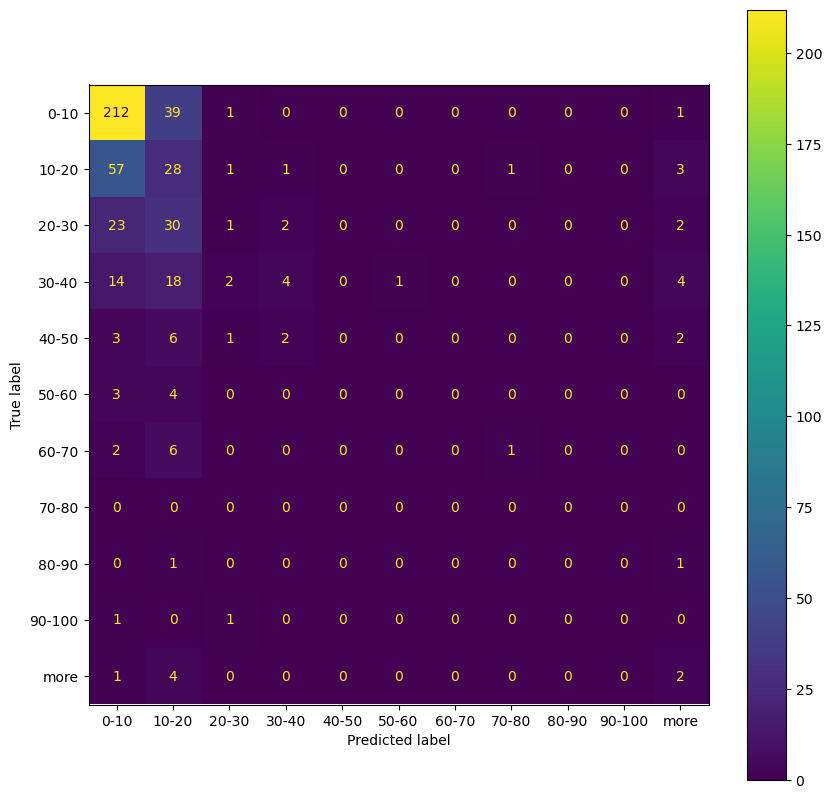

In [19]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pyplot as plt

# bins = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, np.inf]
# bin_labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60-70', '70-80', '80-90', '90-100', 'more']


encoder = OrdinalEncoder(categories=[bin_labels])  # Specify categories for ordinal encoding
df['cc_bin_encoded'] = encoder.fit_transform(df[['cc_bin']])

X = df.drop(columns=["cc_bin", "cc_bin_encoded"])  # Drop the target columns
y = df["cc_bin_encoded"]  # The target with ordinal encoding
display(df)
display(y)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestClassifier(max_depth=10,
                               min_samples_leaf=4,
                               min_samples_split=2,
                               n_estimators=50,
                               )
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=encoder.categories_[0])

fig, ax = plt.subplots(figsize=(10,10))
disp.plot(ax=ax)
plt.show()



In [20]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

# # Define the parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [50, 100, 200],  # Number of trees in the forest
#     'max_depth': [None, 10, 20, 30],  # Max depth of the trees
#     'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
#     'min_samples_leaf': [1, 2, 4],    # Minimum number of samples required to be at a leaf node
#     'bootstrap': [True, False]        # Whether bootstrap samples are used when building trees
# }

# # Create the RandomForestClassifier model
# model = RandomForestClassifier(random_state=31)

# # Set up GridSearchCV
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

# # Fit the grid search
# grid_search.fit(X_train, y_train)

# # Best hyperparameters found by GridSearchCV
# print(f"Best parameters: {grid_search.best_params_}")

# # Predict using the best model from GridSearchCV
# y_pred = grid_search.best_estimator_.predict(X_test)

# # Print the classification report
# print(classification_report(y_test, y_pred))

# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid_search.best_estimator_.classes_)
# disp.plot()
